In [48]:
# Step 0: Imports and Authentication
import os, glob
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import geopandas as gpd
import pandas as pd
from dotenv import load_dotenv
import zipfile

# Load environment variables (if using .env for credentials)
load_dotenv()

ARCGIS_CLIENT_ID = os.getenv("ARCGIS_CLIENT_ID")
INPUT_DATA = 'input_data/USA_population.*'

# Authenticate to ArcGIS Online
gis = GIS("https://ucalgary.maps.arcgis.com/home", client_id=ARCGIS_CLIENT_ID)
gis

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucalgary.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=xXQoqgcPyQNXbUSD&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=8wVkTdBoTDXDfMgVJ45u4fcF72qHDQ&allow_verification=false


GIS @ https://ucalgary.maps.arcgis.com version:2025.2

<Item title:"Rivers AOI" type:Feature Layer Collection owner:tek.kshetri@ucalgary.ca_ucalgary>
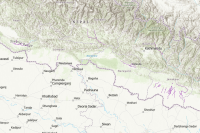

In [49]:
item = gis.content.get('1dc0824ef10b4ddd83a0f509793fb83d')
item

In [50]:
item.layers[0]

<FeatureLayer url:"https://services2.arcgis.com/XSv3KNGfmrd1txPN/arcgis/rest/services/Rivers_AOI/FeatureServer/0">

In [51]:
item.layers[0].properties

{
  "currentVersion": 11.5,
  "id": 0,
  "name": "Rivers_AOI",
  "type": "Feature Layer",
  "serviceItemId": "1dc0824ef10b4ddd83a0f509793fb83d",
  "cacheMaxAge": 30,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1711393347864,
    "schemaLastEditDate": 1711393343533,
    "dataLastEditDate": 1711393343533
  },
  "relationships": [],
  "isDataVersioned": false,
  "hasContingentValuesDefinition": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": true,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": true,
  "supportsLayerOverrides": true,
  "supportsTilesAndBasicQueriesMode": true,
  "sup

In [52]:
features = item.layers[0].query(where="1=1", out_fields='*', return_geometry=True)
features.sdf.head()

,FID,fid_1,cat,value,label,Name,Shape_Leng,Shape__Length,SHAPE
0,1,0.0,1857,21516,,Janakpur,0.0,33803.351614,"{""paths"": [[[9520640.00535947, 3122419.9308052..."
1,2,0.0,1875,7761,,Janakpur,0.0,167520.600441,"{""paths"": [[[9556044.5322497, 3096241.49541686..."
2,3,0.0,2091,21123,,Janakpur,0.0,37162.275778,"{""paths"": [[[9527816.83265066, 3121346.5176998..."
3,4,0.0,2486,21237,,Janakpur,0.0,20115.391867,"{""paths"": [[[9539685.71936617, 3109681.3465431..."
4,5,0.0,2508,18250,,Janakpur,0.0,27652.856919,"{""paths"": [[[9547243.3712132, 3108996.95962279..."


c:\Users\tek\Desktop\try\arcgis_with_opensource\.venv\Lib\site-packages\IPython\core\interactiveshell.py:3699: DeprecatedWarning: add is deprecated as of 2.3.0 and has been removed in 3.0.0. Use `Folder.add()` instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


<Item title:"USA Population Data" type:Feature Layer Collection owner:tek.kshetri@ucalgary.ca_ucalgary>
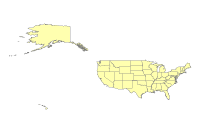

In [53]:
# create zip file based on input data
def create_zip_from_input_data(input_data_pattern):
    input_files = glob.glob(input_data_pattern)
    if not input_files:
        raise FileNotFoundError(f"No files found matching pattern: {input_data_pattern}")
    
    zip_filename = "input_data/USA_population.zip"
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        for file in input_files:
            zipf.write(file, os.path.basename(file))
    return zip_filename

# Step 1: Create a ZIP file from input data
zip_file = create_zip_from_input_data(INPUT_DATA)

# Step 2: Upload the ZIP file to ArcGIS Online
item_properties = {
    "title": "USA Population Data",
    "tags": "USA, population, data",
    "type": "Shapefile",
    "description": "Population data for the USA in shapefile format."
}

item = gis.content.add(item_properties, data=zip_file)

# Step 3: Publish the shapefile as a feature layer
feature_layer_item = item.publish()

# Step 4: Access the feature layer as a GeoDataFrame
feature_layer_item

In [54]:
layer = feature_layer_item.layers[0]
features = layer.query(where="1=1", out_fields='*', return_geometry=True)
gdf = features.sdf
gdf.head()

,FID,ObjectID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,POP2000,POP2010,POP00_SQMI,POP10_SQMI,...,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI,Shape_Leng,Shape_Area,Shape__Area,Shape__Length,SHAPE
0,1,0,Hawaii,15,Pacific,HI,1211537,1309580,110.8,119.8,...,7521.0,149.0,177626.0,68.29,10931,1366541.05664,18769343287.5,18880665597.648438,1370185.231706,"{""rings"": [[[-17819334.3006, 2512026.77746735]..."
1,2,1,Washington,53,Pacific,WA,5894121,6756150,82.7,94.8,...,39284.0,381.0,7609210.0,172.92,71297,4571637.59534,378715704491.0,379885502888.3125,4578373.133747,"{""rings"": [[[-13625730.0473, 6144404.9648697],..."
2,3,2,Montana,30,Mountain,MT,902195,983932,6.1,6.7,...,29524.0,2079.0,18241710.0,94.94,147038,4331958.135,818613790128.0,821174410984.953125,4337068.264641,"{""rings"": [[[-12409387.5601, 5574754.26675416]..."
3,4,3,Maine,23,New England,ME,1274923,1338645,32.2,33.8,...,8136.0,166.0,529253.0,75.86,39555,2602078.3638,168403892949.0,168963254715.703125,2608008.84643,"{""rings"": [[[-7767570.8614, 5476923.98355704],..."
4,5,4,North Dakota,38,West North Central,ND,642200,662194,9.1,9.4,...,31970.0,1241.0,27527180.0,190.31,70698,2685211.59768,399758331674.0,400989891172.050781,2688189.823836,"{""rings"": [[[-10990621.9637, 5770462.62082452]..."


In [55]:
gdf['Pop_Change'] = gdf['POP2010'] - gdf['POP2000']
gdf['Pop_Change_%'] = ((gdf['Pop_Change']) / gdf['POP2000']) * 100

In [56]:
gdf.head()

,FID,ObjectID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,POP2000,POP2010,POP00_SQMI,POP10_SQMI,...,CROP_ACR07,AVG_SALE07,SQMI,Shape_Leng,Shape_Area,Shape__Area,Shape__Length,SHAPE,Pop_Change,Pop_Change_%
0,1,0,Hawaii,15,Pacific,HI,1211537,1309580,110.8,119.8,...,177626.0,68.29,10931,1366541.05664,18769343287.5,18880665597.648438,1370185.231706,"{""rings"": [[[-17819334.3006, 2512026.77746735]...",98043,8.092448
1,2,1,Washington,53,Pacific,WA,5894121,6756150,82.7,94.8,...,7609210.0,172.92,71297,4571637.59534,378715704491.0,379885502888.3125,4578373.133747,"{""rings"": [[[-13625730.0473, 6144404.9648697],...",862029,14.625234
2,3,2,Montana,30,Mountain,MT,902195,983932,6.1,6.7,...,18241710.0,94.94,147038,4331958.135,818613790128.0,821174410984.953125,4337068.264641,"{""rings"": [[[-12409387.5601, 5574754.26675416]...",81737,9.059793
3,4,3,Maine,23,New England,ME,1274923,1338645,32.2,33.8,...,529253.0,75.86,39555,2602078.3638,168403892949.0,168963254715.703125,2608008.84643,"{""rings"": [[[-7767570.8614, 5476923.98355704],...",63722,4.998106
4,5,4,North Dakota,38,West North Central,ND,642200,662194,9.1,9.4,...,27527180.0,190.31,70698,2685211.59768,399758331674.0,400989891172.050781,2688189.823836,"{""rings"": [[[-10990621.9637, 5770462.62082452]...",19994,3.11336


In [57]:
#EPSG of the data
feature_layer_item.layers[0].properties.spatialReference

{
  "wkid": 102100,
  "latestWkid": 3857
}

In [58]:
gdf_v2 = gpd.GeoDataFrame(gdf, geometry='SHAPE', crs='EPSG:3857')
gdf_v2.head()

,FID,ObjectID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,POP2000,POP2010,POP00_SQMI,POP10_SQMI,...,CROP_ACR07,AVG_SALE07,SQMI,Shape_Leng,Shape_Area,Shape__Area,Shape__Length,SHAPE,Pop_Change,Pop_Change_%
0,1,0,Hawaii,15,Pacific,HI,1211537,1309580,110.8,119.8,...,177626.0,68.29,10931,1366541.05664,18769343287.5,18880665597.648438,1370185.231706,"MULTIPOLYGON (((-17819334.301 2512026.777, -17...",98043,8.092448
1,2,1,Washington,53,Pacific,WA,5894121,6756150,82.7,94.8,...,7609210.0,172.92,71297,4571637.59534,378715704491.0,379885502888.3125,4578373.133747,"MULTIPOLYGON (((-13625730.047 6144404.965, -13...",862029,14.625234
2,3,2,Montana,30,Mountain,MT,902195,983932,6.1,6.7,...,18241710.0,94.94,147038,4331958.135,818613790128.0,821174410984.953125,4337068.264641,"POLYGON ((-12409387.56 5574754.267, -12409986....",81737,9.059793
3,4,3,Maine,23,New England,ME,1274923,1338645,32.2,33.8,...,529253.0,75.86,39555,2602078.3638,168403892949.0,168963254715.703125,2608008.84643,"MULTIPOLYGON (((-7767570.861 5476923.984, -777...",63722,4.998106
4,5,4,North Dakota,38,West North Central,ND,642200,662194,9.1,9.4,...,27527180.0,190.31,70698,2685211.59768,399758331674.0,400989891172.050781,2688189.823836,"POLYGON ((-10990621.964 5770462.621, -11021390...",19994,3.11336


<Axes: >

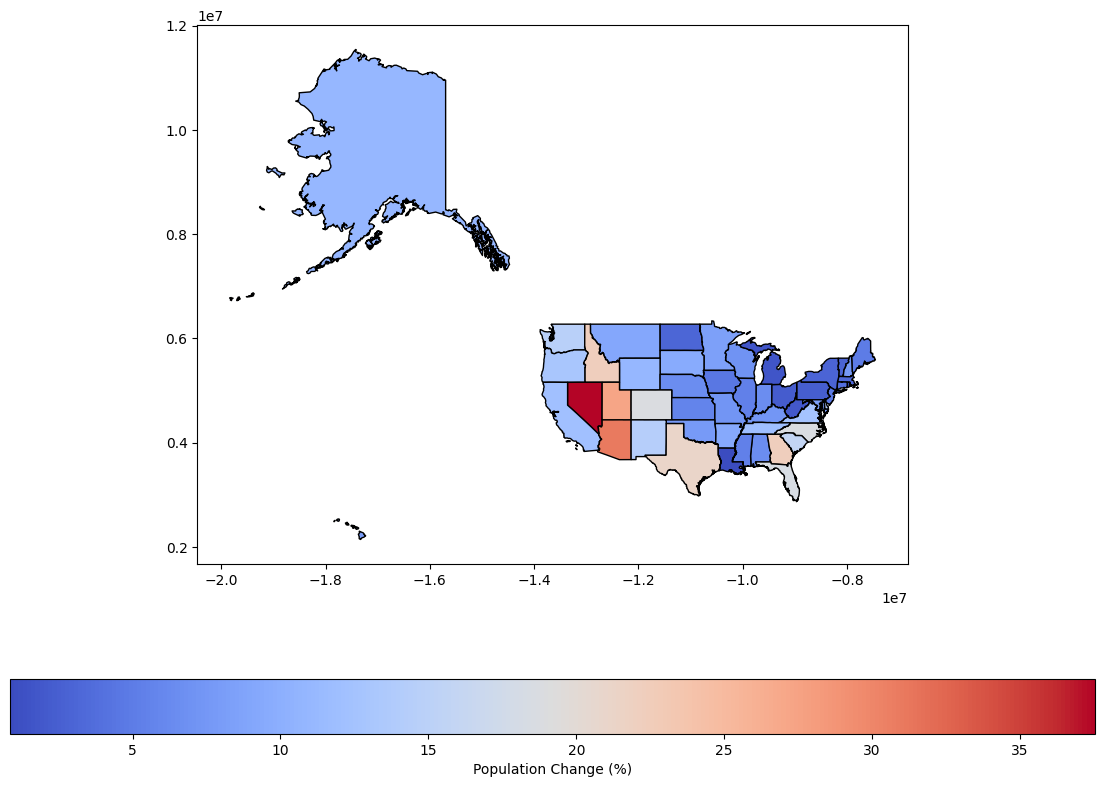

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# plot cloropleth map based on population change percentage
gdf_v2.plot(column='Pop_Change_%', ax=ax, legend=True,
            legend_kwds={'label': "Population Change (%)",
                        'orientation': "horizontal"},
            cmap='coolwarm', edgecolor='black')

In [60]:
geojson_data = gdf_v2.to_crs('EPSG:4326').__geo_interface__
geojson_data['features'][0]['properties']

{'FID': 1,
 'ObjectID': 0,
 'STATE_NAME': 'Hawaii',
 'STATE_FIPS': '15',
 'SUB_REGION': 'Pacific',
 'STATE_ABBR': 'HI',
 'POP2000': 1211537,
 'POP2010': 1309580,
 'POP00_SQMI': 110.8,
 'POP10_SQMI': 119.8,
 'WHITE': 294102,
 'BLACK': 22003,
 'AMERI_ES': 3535,
 'ASIAN': 503868,
 'HAWN_PI': 113539,
 'OTHER': 15147,
 'MULT_RACE': 259343,
 'HISPANIC': 87699,
 'MALES': 608671,
 'FEMALES': 602866,
 'AGE_UNDER5': 78163,
 'AGE_5_17': 217604,
 'AGE_18_21': 65456,
 'AGE_22_29': 133437,
 'AGE_30_39': 183094,
 'AGE_40_49': 185646,
 'AGE_50_64': 187536,
 'AGE_65_UP': 160601,
 'MED_AGE': 36.2,
 'MED_AGE_M': 35.1,
 'MED_AGE_F': 37.4,
 'HOUSEHOLDS': 403240,
 'AVE_HH_SZ': 2.92,
 'HSEHLD_1_M': 43253,
 'HSEHLD_1_F': 44900,
 'MARHH_CHD': 96758,
 'MARHH_NO_C': 119319,
 'MHH_CHILD': 8945,
 'FHH_CHILD': 23619,
 'FAMILIES': 287068,
 'AVE_FAM_SZ': 3.42,
 'HSE_UNITS': 460542,
 'VACANT': 57302,
 'OWNER_OCC': 227888,
 'RENTER_OCC': 175352,
 'NO_FARMS07': 7521.0,
 'AVG_SIZE07': 149.0,
 'CROP_ACR07': 177626.0,
 'AV

In [62]:
import folium
from folium.features import GeoJsonTooltip

# geojson_data = gdf_v2.__geo_interface__
# print(geojson_data['features'][0]['properties'])

m = folium.Map(location=[37.8, -96], zoom_start=4)
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=gdf_v2,
    columns=['STATE_NAME', 'Pop_Change_%'],
    key_on='feature.properties.STATE_NAME',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Change (%) (2000–2010)'
).add_to(m)

tooltip = GeoJsonTooltip(fields=["STATE_NAME", "Pop_Change_%"],
                         aliases=["State:", "Population Change (%):"])
choropleth.geojson.add_child(tooltip)

m